In [1]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd                             # Pandas for data manipulation and analysis
import numpy as np                              # NumPy for numerical operations
import matplotlib.pyplot as plt                 # Matplotlib for basic plotting
import seaborn as sns                           # Seaborn for statistical data visualization
from statsmodels.tsa.seasonal import seasonal_decompose   # For decomposing time series data
import plotly.express as px                     # Plotly Express for interactive visualizations

# Setting display options to show three decimal places for floating-point numbers in Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### **LOADING DATASET**

In [2]:
# Display all columns without truncation
pd.set_option('display.max_columns', None)

# Load car-related dataset from URL into 'stores' DataFrame
url = 'https://raw.githubusercontent.com/Vivega28/WEEK_6_PREPINSTA/main/train.csv'
stores = pd.read_csv(url, encoding='unicode_escape')

# Display first two rows of the loaded DataFrame
stores.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.000,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.000,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940


In [3]:
# Remove 'Row ID' column from 'stores' DataFrame
del stores["Row ID"]

# Display first two rows
stores.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.000,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.000,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940


### **Preliminary Data Inspection**

In [4]:
# Display data types of columns in the 'stores' DataFrame
stores.dtypes


Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [5]:
# Display concise information about the 'stores' DataFrame, including data types and memory usage
stores.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9789 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [6]:
stores.shape

(9800, 17)

In [7]:
stores.describe()

,Postal Code,Sales
count,9789.000,9800.000
mean,55273.322,230.769
std,32041.223,626.652
min,1040.000,0.444
25%,23223.000,17.248
50%,58103.000,54.490
75%,90008.000,210.605
max,99301.000,22638.480



### **Data Cleaning and Viewing**
**1. Handling the missing values and standardizing Date values**

This code checks for duplicate rows in the 'stores' DataFrame and calculates the total number of duplicate rows.


In [8]:
# Check for duplicate rows in 'stores' DataFrame
stores.duplicated().sum()

1

In [9]:
# Drop duplicate rows from the 'stores' DataFrame
stores = stores.drop_duplicates()
stores.duplicated().sum()

0

In [10]:
# Check if there are any missing values in the data
stores.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [11]:
stores[stores['Postal Code'].isnull()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.030
5274,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.200
8798,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.750
9146,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.980
9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.040
9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.290
9386,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.920
9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.280
9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.940
9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.040


In [12]:
# Replace null values in the 'Postal Code' column of the 'stores' DataFrame with 5401
stores['Postal Code'] = stores['Postal Code'].replace(np.nan, 5401)

# Check for missing values after the replacement
stores.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [13]:
stores.shape

(9799, 17)

In [14]:
# Convert 'Order Date' to the standard format 'YYYY-MM-DD'
stores['Order Date'] = pd.to_datetime(stores['Order Date'], format='%d/%m/%Y')
stores['Order Date']


0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9795   2017-05-21
9796   2016-01-12
9797   2016-01-12
9798   2016-01-12
9799   2016-01-12
Name: Order Date, Length: 9799, dtype: datetime64[ns]

In [15]:
# Convert 'Ship Date' to the standard format 'YYYY-MM-DD'
stores['Ship Date'] = pd.to_datetime(stores['Ship Date'], format='%d/%m/%Y')
stores['Ship Date']

0      2017-11-11
1      2017-11-11
2      2017-06-16
3      2016-10-18
4      2016-10-18
          ...    
9795   2017-05-28
9796   2016-01-17
9797   2016-01-17
9798   2016-01-17
9799   2016-01-17
Name: Ship Date, Length: 9799, dtype: datetime64[ns]

In [16]:
# Calculate the days taken to ship and create a new 'Days to Ship' column in the 'stores' DataFrame
stores['Days to Ship'] = (stores['Ship Date'] - stores['Order Date']).dt.days
stores['Days to Ship']

0       3
1       3
2       4
3       7
4       7
       ..
9795    7
9796    5
9797    5
9798    5
9799    5
Name: Days to Ship, Length: 9799, dtype: int64

In [17]:
# Calculate the days taken to ship and create a new 'Days to Ship' column in the 'stores' DataFrame
stores['Days to Ship'] = (stores['Ship Date'] - stores['Order Date']).dt.days
stores['Days to Ship']

0       3
1       3
2       4
3       7
4       7
       ..
9795    7
9796    5
9797    5
9798    5
9799    5
Name: Days to Ship, Length: 9799, dtype: int64

In [18]:
# Display a random sample of one row from the 'stores' DataFrame
stores.sample()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Days to Ship
3241,US-2017-140809,2017-02-01,2017-02-03,First Class,CK-12760,Cyma Kinney,Corporate,United States,Arlington,Virginia,22204.000,South,OFF-ST-10002214,Office Supplies,Storage,X-Rack File for Hanging Folders,56.450,2



### **2. Viewing Order ID Dataset**

This code prints the unique values and the total number of unique values in the 'Order ID' column of the 'stores' DataFrame.


In [19]:
# Display unique values and the total number of unique values in the 'Order ID' column of the 'stores' DataFrame
print('Unique Values: \n', stores['Order ID'].unique())
print('Total Number of Unique Values: ', stores['Order ID'].nunique())

Unique Values: 
 ['CA-2017-152156' 'CA-2017-138688' 'US-2016-108966' ... 'CA-2015-127166'
 'CA-2017-125920' 'CA-2016-128608']
Total Number of Unique Values:  4922



### **3. Viewing Order Date Dataset**

This code prints the unique values and the total number of unique values in the 'Order Date' column of the 'stores' DataFrame.


In [20]:
# Display unique values and the total number of unique values in the 'Order Date' column of the 'stores' DataFrame
print('Unique Values: \n', stores['Order Date'].unique())
print('Total Number of Unique Values: ', stores['Order Date'].nunique())


Unique Values: 
 ['2017-11-08T00:00:00.000000000' '2017-06-12T00:00:00.000000000'
 '2016-10-11T00:00:00.000000000' ... '2015-06-18T00:00:00.000000000'
 '2018-02-28T00:00:00.000000000' '2016-05-09T00:00:00.000000000']
Total Number of Unique Values:  1230



### **4. Viewing Ship Date Dataset**

This code prints the unique values and the total number of unique values in the 'Ship Date' column of the 'stores' DataFrame.


In [21]:
# Display unique values and the total number of unique values in the 'Ship Date' column of the 'stores' DataFrame
print('Unique Values: \n', stores['Ship Date'].unique())
print('Total Number of Unique Values: ', stores['Ship Date'].nunique())


Unique Values: 
 ['2017-11-11T00:00:00.000000000' '2017-06-16T00:00:00.000000000'
 '2016-10-18T00:00:00.000000000' ... '2015-03-12T00:00:00.000000000'
 '2018-04-06T00:00:00.000000000' '2016-05-13T00:00:00.000000000']
Total Number of Unique Values:  1326



### **5. Viewing Days to Ship Dataset**

This code prints the unique values and the total number of unique values in the 'Days to Ship' column of the 'stores' DataFrame.


In [22]:

# Display unique values and the total number of unique values in the 'Days to Ship' column of the 'stores' DataFrame
print('Unique Values: \n', stores['Days to Ship'].unique())
print('Total Number of Unique Values: ', stores['Days to Ship'].nunique())

Unique Values: 
 [3 4 7 5 2 6 1 0]
Total Number of Unique Values:  8



### **6. Viewing Customer ID Dataset**

This code prints the unique values and the total number of unique values in the 'Customer ID' column of the 'stores' DataFrame.


In [23]:
# Display unique values and the total number of unique values in the 'Customer ID' column of the 'stores' DataFrame
print('Unique Values: \n', stores['Customer ID'].unique())
print('Total Number of Unique Values: ', stores['Customer ID'].nunique())

Unique Values: 
 ['CG-12520' 'DV-13045' 'SO-20335' 'BH-11710' 'AA-10480' 'IM-15070'
 'HP-14815' 'PK-19075' 'AG-10270' 'ZD-21925' 'KB-16585' 'SF-20065'
 'EB-13870' 'EH-13945' 'TB-21520' 'MA-17560' 'GH-14485' 'SN-20710'
 'LC-16930' 'RA-19885' 'ES-14080' 'ON-18715' 'PO-18865' 'LH-16900'
 'DP-13000' 'JM-15265' 'TB-21055' 'KM-16720' 'PS-18970' 'BS-11590'
 'KD-16270' 'HM-14980' 'JE-15745' 'KB-16600' 'SC-20770' 'DN-13690'
 'JC-16105' 'CS-12400' 'PG-18895' 'GM-14455' 'JS-15685' 'KB-16315'
 'RB-19705' 'PN-18775' 'KD-16345' 'ER-13855' 'RB-19465' 'GZ-14470'
 'LC-16870' 'JM-15250' 'PA-19060' 'CV-12805' 'CL-12565' 'RC-19960'
 'DK-13090' 'GG-14650' 'SC-20725' 'AD-10180' 'PF-19165' 'TS-21610'
 'LS-16975' 'DW-13585' 'LC-16885' 'JD-15895' 'SH-19975' 'SG-20080'
 'HA-14920' 'MG-17680' 'JE-16165' 'TW-21025' 'SP-20650' 'NK-18490'
 'DB-13060' 'NP-18670' 'TT-21070' 'EM-13960' 'RD-19900' 'MJ-17740'
 'BM-11140' 'CS-12130' 'JB-15400' 'SJ-20500' 'JK-15640' 'DK-13150'
 'RM-19675' 'SK-19990' 'FM-14290' 'AM-10360' 


### **7. Viewing Customer Name Dataset**

This code prints the unique values and the total number of unique values in the 'Customer Name' column of the 'stores' DataFrame.


In [24]:
# Display unique values and the total number of unique values in the 'Customer Name' column of the 'stores' DataFrame
print('Unique Values: \n', stores['Customer Name'].unique())
print('Total Number of Unique Values: ', stores['Customer Name'].nunique())


Unique Values: 
 ['Claire Gute' 'Darrin Van Huff' "Sean O'Donnell" 'Brosina Hoffman'
 'Andrew Allen' 'Irene Maddox' 'Harold Pawlan' 'Pete Kriz'
 'Alejandro Grove' 'Zuschuss Donatelli' 'Ken Black' 'Sandra Flanagan'
 'Emily Burns' 'Eric Hoffmann' 'Tracy Blumstein' 'Matt Abelman'
 'Gene Hale' 'Steve Nguyen' 'Linda Cazamias' 'Ruben Ausman' 'Erin Smith'
 'Odella Nelson' "Patrick O'Donnell" 'Lena Hernandez' 'Darren Powers'
 'Janet Molinari' 'Ted Butterfield' 'Kunst Miller' 'Paul Stevenson'
 'Brendan Sweed' 'Karen Daniels' 'Henry MacAllister' 'Joel Eaton'
 'Ken Brennan' 'Stewart Carmichael' 'Duane Noonan' 'Julie Creighton'
 'Christopher Schild' 'Paul Gonzalez' 'Gary Mitchum' 'Jim Sink'
 'Karl Braun' 'Roger Barcio' 'Parhena Norris' 'Katherine Ducich'
 'Elpida Rittenbach' 'Rick Bensley' 'Gary Zandusky' 'Lena Cacioppo'
 'Janet Martin' 'Pete Armstrong' 'Cynthia Voltz' 'Clay Ludtke'
 'Ryan Crowe' 'Dave Kipp' 'Greg Guthrie' 'Steven Cartwright'
 'Alan Dominguez' 'Philip Fox' 'Troy Staebel' 'Lindsay 


### **8. Viewing Segment Dataset**

This code prints the unique values and the total number of unique values in the 'Segment' column of the 'stores' DataFrame.


In [25]:
# Display unique values and the total number of unique values in the 'Segment' column of the 'stores' DataFrame
print('Unique Values: \n', stores['Segment'].unique())
print('Total Number of Unique Values: ', stores['Segment'].nunique())

Unique Values: 
 ['Consumer' 'Corporate' 'Home Office']
Total Number of Unique Values:  3



### **9. Viewing Country Dataset**

This code prints the unique values and the total number of unique values in the 'Country' column of the 'stores' DataFrame.


In [26]:
# Display unique values and the total number of unique values in the 'Country' column of the 'stores' DataFrame
print('Unique Values: \n', stores['Country'].unique())
print('Total Number of Unique Values: ', stores['Country'].nunique())

Unique Values: 
 ['United States']
Total Number of Unique Values:  1



### **10. Viewing City Dataset**

This code prints the unique values and the total number of unique values in the 'City' column of the 'stores' DataFrame.


In [27]:
# Display unique values and the total number of unique values in the 'City' column of the 'stores' DataFrame
print('Unique Values: \n', stores['City'].unique())
print('Total Number of Unique Values: ', stores['City'].nunique())


Unique Values: 
 ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 'Tamarac' 'Colorado Springs'
 'Belleville' 'Taylor' 'Lakewood' 'Arlington' 'Arvada' 'Hackensack'
 '


### **11. Viewing State Dataset**

This code prints the unique values and the total number of unique values in the 'State' column of the 'stores' DataFrame.


In [28]:
# Display unique values and the total number of unique values in the 'State' column of the 'stores' DataFrame
print('Unique Values: \n', stores['State'].unique())
print('Total Number of Unique Values: ', stores['State'].nunique())


Unique Values: 
 ['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']
Total Number of Unique Values:  49



### **12. Viewing Postal Code Dataset**

This code prints the unique values and the total number of unique values in the 'Postal Code' column of the 'stores' DataFrame.


In [29]:
# Display unique values and the total number of unique values in the 'Postal Code' column of the 'stores' DataFrame
print('Unique Values: \n', stores['Postal Code'].unique())
print('Total Number of Unique Values: ', stores['Postal Code'].nunique())


Unique Values: 
 [42420. 90036. 33311. 90032. 28027. 98103. 76106. 53711. 84084. 94109.
 68025. 19140. 84057. 90049. 77095. 75080. 77041. 60540. 32935. 55122.
 48185. 19901. 47150. 10024. 12180. 90004. 60610. 85234. 22153. 10009.
 49201. 38109. 77070. 35601. 94122. 27707. 60623. 29203. 55901. 55407.
 97206. 55106. 80013. 28205. 60462. 10035. 50322. 43229. 37620. 19805.
 61701. 85023. 95661. 64055. 91104. 43055. 53132. 85254. 95123. 98105.
 98115. 73034. 90045. 19134. 88220. 78207. 77036. 62521. 71203.  6824.
 75051. 92374. 45011.  7090. 19120. 44312. 80219. 75220. 37064. 90604.
 48601. 44256. 43017. 48227. 38401. 33614. 95051. 55044. 92037. 77506.
 94513. 27514.  7960. 45231. 94110. 90301. 33319. 80906.  7109. 48180.
  8701. 22204. 80004.  7601. 33710. 19143. 90805. 92345. 37130. 84041.
 78745.  1852. 31907.  6040. 78550. 85705. 62301.  2038. 33024. 98198.
 61604. 89115.  2886. 33180. 28403. 92646. 40475. 80027.  1841. 39212.
 48187. 10801. 28052. 32216. 47201. 13021. 73071. 94521. 600


### **13. Viewing Region Dataset**

This code prints the unique values and the total number of unique values in the 'Region' column of the 'stores' DataFrame.


In [30]:
# Display unique values and the total number of unique values in the 'Region' column of the 'stores' DataFrame
print('Unique Values: \n', stores['Region'].unique())
print('Total Number of Unique Values: ', stores['Region'].nunique())


Unique Values: 
 ['South' 'West' 'Central' 'East']
Total Number of Unique Values:  4



### **14. Viewing Product ID Dataset**

This code prints the unique values and the total number of unique values in the 'Product ID' column of the 'stores' DataFrame.


In [31]:
# Display unique values and the total number of unique values in the 'Product ID' column of the 'stores' DataFrame
print('Unique Values: \n', stores['Product ID'].unique())
print('Total Number of Unique Values: ', stores['Product ID'].nunique())


Unique Values: 
 ['FUR-BO-10001798' 'FUR-CH-10000454' 'OFF-LA-10000240' ...
 'TEC-MA-10003589' 'OFF-AP-10003099' 'TEC-PH-10002645']
Total Number of Unique Values:  1861



### **15. Viewing Category Dataset**

This code prints the unique values and the total number of unique values in the 'Category' column of the 'stores' DataFrame.


In [32]:


# Display unique values and the total number of unique values in the 'Category' column of the 'stores' DataFrame
print('Unique Values: \n', stores['Category'].unique())
print('Total Number of Unique Values: ', stores['Category'].nunique())




Unique Values: 
 ['Furniture' 'Office Supplies' 'Technology']
Total Number of Unique Values:  3



### **16. Viewing Sub-Category Dataset**

This code prints the unique values and the total number of unique values in the 'Sub-Category' column of the 'stores' DataFrame.


In [33]:
# Display unique values and the total number of unique values in the 'Sub-Category' column of the 'stores' DataFrame
print('Unique Values: \n', stores['Sub-Category'].unique())
print('Total Number of Unique Values: ', stores['Sub-Category'].nunique())


Unique Values: 
 ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
Total Number of Unique Values:  17



### **### 17. Viewing Product Name Dataset **

This code prints the unique values and the total number of unique values in the 'Product Name' column of the 'stores' DataFrame.


In [34]:
# Display unique values and the total number of unique values in the 'Product Name' column of the 'stores' DataFrame
print('Unique Values: \n', stores['Product Name'].unique())
print('Total Number of Unique Values: ', stores['Product Name'].nunique())


Unique Values: 
 ['Bush Somerset Collection Bookcase'
 'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back'
 'Self-Adhesive Address Labels for Typewriters by Universal' ...
 'Cisco 8961 IP Phone Charcoal' 'Eureka Hand Vacuum, Bagless' 'LG G2']
Total Number of Unique Values:  1849



### **18. Viewing Sales Dataset**

This code prints the unique values and the total number of unique values in the 'Sales' column of the 'stores' DataFrame.


In [35]:
# Display unique values and the total number of unique values in the 'Sales' column of the 'stores' DataFrame
print('Unique Values: \n', stores['Sales'].unique())
print('Total Number of Unique Values: ', stores['Sales'].nunique())


Unique Values: 
 [261.96  731.94   14.62  ... 235.188  26.376  10.384]
Total Number of Unique Values:  5757



### **Viewing & Saving Clean Data**

Viewing the final and cleaned data, saving it into .csv format

Here, the column names in the 'stores' DataFrame are modified by replacing spaces with underscores and converting them to lowercase for consistency.


In [36]:
stores.columns = [col.replace(' ', '_').replace('-', '_').lower() for col in stores.columns] # Rename columns by replacing spaces with underscores and converting to lowercase


In [37]:
stores.sample(5)                 # Display a random sample of 5 rows from the modified 'stores' DataFrame


,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,days_to_ship
1709,CA-2018-123491,2018-10-30,2018-11-05,Standard Class,JK-15205,Jamie Kunitz,Consumer,United States,San Francisco,California,94122.000,West,FUR-CH-10003061,Furniture,Chairs,"Global Leather Task Chair, Black",71.992,6
9584,CA-2018-132584,2018-08-26,2018-08-27,First Class,HJ-14875,Heather Jas,Home Office,United States,Detroit,Michigan,48234.000,Central,OFF-ST-10000344,Office Supplies,Storage,"Neat Ideas Personal Hanging Folder Files, Black",53.720,1
5361,CA-2018-100951,2018-06-09,2018-06-10,First Class,NC-18625,Noah Childs,Corporate,United States,Dallas,Texas,75217.000,Central,OFF-ST-10001496,Office Supplies,Storage,Standard Rollaway File with Lock,720.760,1
2791,CA-2015-125514,2015-09-21,2015-09-22,First Class,BM-11650,Brian Moss,Corporate,United States,Omaha,Nebraska,68104.000,Central,OFF-AP-10003281,Office Supplies,Appliances,Acco 6 Outlet Guardian Standard Surge Suppressor,36.270,1
3894,US-2015-112200,2015-11-22,2015-11-28,Standard Class,TC-21475,Tony Chapman,Home Office,United States,Bolingbrook,Illinois,60440.000,Central,OFF-BI-10002571,Office Supplies,Binders,"Avery Framed View Binder, EZD Ring (Locking), ...",9.980,6


In [38]:
print(stores.dtypes)       # Display data types of each column in the modified 'stores' DataFrame


order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code             float64
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales                   float64
days_to_ship              int64
dtype: object


In [39]:
print(stores.isnull().sum().sum())

0


In [40]:
print(stores.shape)

(9799, 18)


In [41]:
print(stores.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9799 non-null   object        
 1   order_date     9799 non-null   datetime64[ns]
 2   ship_date      9799 non-null   datetime64[ns]
 3   ship_mode      9799 non-null   object        
 4   customer_id    9799 non-null   object        
 5   customer_name  9799 non-null   object        
 6   segment        9799 non-null   object        
 7   country        9799 non-null   object        
 8   city           9799 non-null   object        
 9   state          9799 non-null   object        
 10  postal_code    9799 non-null   float64       
 11  region         9799 non-null   object        
 12  product_id     9799 non-null   object        
 13  category       9799 non-null   object        
 14  sub_category   9799 non-null   object        
 15  product_name   9799 n

In [42]:
stores.to_csv('stores_data_cleaned.csv', index=False)

### **Statistics & Data Vizualization**

## **Data Analysis**


**1.1. Descriptive Numeric Analysis**

This code generates descriptive statistics, such as mean, standard deviation, minimum, and maximum values, for numerical columns in the 'stores' DataFrame

In [43]:
# Generate descriptive statistics for numerical columns in the 'stores' DataFrame
stores.describe()

,postal_code,sales,days_to_ship
count,9799.000,9799.000,9799.000
mean,55218.567,230.764,3.961
std,32068.158,626.684,1.750
min,1040.000,0.444,0.000
25%,23223.000,17.248,3.000
50%,57701.000,54.480,4.000
75%,90008.000,210.572,5.000
max,99301.000,22638.480,7.000


In [44]:
# Generate descriptive statistics for numerical columns in the 'stores' DataFrame
stores.describe()

,postal_code,sales,days_to_ship
count,9799.000,9799.000,9799.000
mean,55218.567,230.764,3.961
std,32068.158,626.684,1.750
min,1040.000,0.444,0.000
25%,23223.000,17.248,3.000
50%,57701.000,54.480,4.000
75%,90008.000,210.572,5.000
max,99301.000,22638.480,7.000


**Observation:**
Gives a desription about the stats on sale price which is only necessary here.


# **1.2. Descriptive Numeric Analysis**

This code generates descriptive statistics for categorical columns in the 'stores' DataFrame, including count, unique values, top value, and frequency.


In [45]:
# Generate descriptive statistics for categorical columns in the 'stores' DataFrame
stores.describe(include=['object'])

,order_id,ship_mode,customer_id,customer_name,segment,country,city,state,region,product_id,category,sub_category,product_name
count,9799,9799,9799,9799,9799,9799,9799,9799,9799,9799,9799,9799,9799
unique,4922,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5858,35,35,5101,9799,891,1946,3140,19,5909,1492,47


# **Observation:**
Gives an idea about the top values of every column, count and frequency of different values.





## **2. Top Customers:**

    Identify the top customers based on total sales or order frequency. This helps in understanding who contributes the most to revenue.

This code identifies and prints the top 5 customers in the 'stores' DataFrame based on the sum of their sales.


In [46]:
# Find and display the top 5 customers based on the sum of their sales
top_customers = stores.groupby('customer_name')['sales'].sum().sort_values(ascending=False).head(5)
print("Top Customers:\n", top_customers)

Top Customers:
 customer_name
Sean Miller     25043.050
Tamara Chand    19052.218
Raymond Buch    15117.339
Tom Ashbrook    14595.620
Adrian Barton   14473.571
Name: sales, dtype: float64


## **Observation:**
Someone should give them some discount for being so loyal to Superstore. Especially, Sean Miller.


## **3. Popular Products:**

    Find the most popular products based on sales or order quantity.

This code identifies and prints the top 10 popular products in the 'stores' DataFrame based on the sum of their sales.


In [47]:
# Find and display the top 10 popular products based on the sum of their sales
popular_products = stores.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)
print("Popular Products:\n", popular_products)


Popular Products:
 product_name
Canon imageCLASS 2200 Advanced Copier                                         61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind   27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                         22638.480
HON 5400 Series Task Chairs for Big and Tall                                  21870.576
GBC DocuBind TL300 Electric Binding System                                    19823.479
GBC Ibimaster 500 Manual ProClick Binding System                              19024.500
Hewlett Packard LaserJet 3310 Copier                                          18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                     18374.895
GBC DocuBind P400 Electric Binding System                                     17965.068
High Speed Automatic Electric Letter Opener                                   17030.312
Name: sales, dtype: float64


**Observation:**
Looks like Copier and Binding machine are used so roughly, that they are ordered repeatedly.


### **4. Customer Segmentation:**

    Explore different customer segments and their characteristics.

This code calculates and prints the average sales for each customer segment in the 'stores' DataFrame.


In [48]:
# Calculate and display the average sales for each customer segment
customer_segmentation = stores.groupby('segment')['sales'].mean()
print("Average Sales by Customer Segment:\n", customer_segmentation)


Average Sales by Customer Segment:
 segment
Consumer      225.066
Corporate     233.151
Home Office   243.382
Name: sales, dtype: float64




Observation:
Looks like everyone opted for work from home.



## **5. Temporal Trends:**

    Analyze trends over time, such as monthly or yearly sales growth.

This code calculates and prints the sum of sales grouped by month, showing temporal trends in the 'stores' DataFrame.


In [49]:
# Calculate and display the sum of sales grouped by month for temporal trends
temporal_trends = stores.groupby(pd.to_datetime(stores['order_date'], format='%m/%d/%Y').dt.to_period("M"))['sales'].sum()
print("Temporal Trends:\n", temporal_trends)


Temporal Trends:
 order_date
2015-01    14205.707
2015-02     4519.892
2015-03    55205.797
2015-04    27625.483
2015-05    23644.303
2015-06    34322.936
2015-07    33781.543
2015-08    27117.536
2015-09    81623.527
2015-10    31453.393
2015-11    77907.661
2015-12    68167.058
2016-01    18066.958
2016-02    11951.411
2016-03    32339.318
2016-04    34154.469
2016-05    29959.531
2016-06    23599.374
2016-07    28608.259
2016-08    36818.342
2016-09    63133.606
2016-10    31011.737
2016-11    75249.399
2016-12    74543.601
2017-01    18542.491
2017-02    22978.815
2017-03    51165.059
2017-04    38679.767
2017-05    56656.908
2017-06    39724.486
2017-07    38320.783
2017-08    30542.200
2017-09    69193.391
2017-10    59583.033
2017-11    79066.496
2017-12    95739.121
2018-01    43476.474
2018-02    19920.997
2018-03    58863.413
2018-04    35541.910
2018-05    43825.982
2018-06    48190.728
2018-07    44825.104
2018-08    62837.848
2018-09    86152.888
2018-10    77448.131
2018-



Observation:
Datewise analysis of sales happened in every month.



6. Geographical Analysis:

    Examine sales performance across different regions, states, or cities.

This code conducts geographical analysis by calculating and printing the top 10 sales in regions, states, and cities in the 'stores' DataFrame.


In [50]:


# Perform geographical analysis by calculating and displaying the top 10 sales in regions, states, and cities
geographical_analysis = stores.groupby(['region', 'state', 'city'])['sales'].sum().sort_values(ascending=False).head(10)
print("Geographical Analysis:\n", geographical_analysis)



Geographical Analysis:
 region   state         city         
East     New York      New York City   252462.547
West     California    Los Angeles     173420.181
         Washington    Seattle         116106.322
         California    San Francisco   109041.120
East     Pennsylvania  Philadelphia    108841.749
Central  Texas         Houston          63956.143
         Illinois      Chicago          47820.133
West     California    San Diego        47521.029
Central  Michigan      Detroit          42446.944
South    Florida       Jacksonville     39133.328
Name: sales, dtype: float64





**Observation:**
The company should open its store in New York city and Los Angeles as the sales are higher there.


## **7. Shipping Analysis:**

    Investigate the relationship between shipping mode and delivery times.

This code calculates and prints the average days to ship for each shipping mode in the 'stores' DataFrame.


In [51]:
# Calculate and display the average days to ship for each shipping mode
shipping_analysis = stores.groupby('ship_mode')['days_to_ship'].mean()
print("Average Days to Ship by Shipping Mode:\n", shipping_analysis)


Average Days to Ship by Shipping Mode:
 ship_mode
First Class      2.179
Same Day         0.045
Second Class     3.249
Standard Class   5.009
Name: days_to_ship, dtype: float64




**Observation:**
Seems fair. Same day delivery is too impressive.


8.Correlation Analysis:
## **bold text**
    Explore correlations between numerical variables [ Correlation isn't necessary for postal code ].

This code computes and prints the correlation matrix between the 'days_to_ship' and 'sales' columns in the 'stores' DataFrame.


In [52]:
# Calculate and display the correlation matrix between 'days_to_ship' and 'sales' columns
correlation_matrix = stores[['days_to_ship', 'sales']].corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
               days_to_ship  sales
days_to_ship         1.000 -0.006
sales               -0.006  1.000





**Observation:**
Gives an analysis of days to ship to sales


## **9. Outliers Detection:**


    Identify and examine outliers in numerical columns.

    Outliers for Sales Column

This code filters rows in the 'stores' DataFrame where sales are greater than the mean plus three times the standard deviation.


In [53]:
# Filter rows in the 'stores' DataFrame where sales exceed the mean plus 3 times the standard deviation
stores[stores['sales'] > stores['sales'].mean() + 3 * stores['sales'].std()]


,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,days_to_ship
27,US-2016-150630,2016-09-17,2016-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140.000,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,4
165,CA-2015-139892,2015-09-08,2015-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,Texas,78207.000,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,4
251,CA-2017-145625,2017-09-11,2017-09-17,Standard Class,KC-16540,Kelly Collister,Consumer,United States,San Diego,California,92037.000,West,TEC-AC-10003832,Technology,Accessories,LogitechÂ P710e Mobile Speakerphone,3347.370,6
262,US-2015-106992,2015-09-19,2015-09-21,Second Class,SB-20290,Sean Braxton,Corporate,United States,Houston,Texas,77036.000,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,3059.982,2
263,US-2015-106992,2015-09-19,2015-09-21,Second Class,SB-20290,Sean Braxton,Corporate,United States,Houston,Texas,77036.000,Central,TEC-MA-10003353,Technology,Machines,Xerox WorkCentre 6505DN Laser Multifunction Pr...,2519.958,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,CA-2016-116638,2016-01-28,2016-01-31,Second Class,JH-15985,Joseph Holt,Consumer,United States,Concord,North Carolina,28027.000,South,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,3
9649,CA-2017-107104,2017-11-26,2017-11-30,Standard Class,MS-17365,Maribeth Schnelling,Consumer,United States,Los Angeles,California,90045.000,West,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,3406.664,4
9660,CA-2017-160717,2017-06-06,2017-06-11,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Santa Barbara,California,93101.000,West,TEC-PH-10001459,Technology,Phones,Samsung Galaxy Mega 6.3,3023.928,5
9741,CA-2016-117086,2016-11-08,2016-11-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,5401.000,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",4404.900,4




Observation:
Those days were really memorabe for company for having more sales than its used to.

    Outliers for days_to_ship Column

This code filters rows in the 'stores' DataFrame where the days to ship exceed the mean plus three times the standard deviation.


In [54]:
# Filter rows in the 'stores' DataFrame where days to ship exceed the mean plus 3 times the standard deviation
stores[stores['days_to_ship'] > stores['days_to_ship'].mean() + 3 * stores['days_to_ship'].std()]


,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,days_to_ship




**Observation:**
Company is more strict to timing

### **10. Average Sales by Category:**

    Showcasing the average Sales by Category:.

This code calculates and prints the average sales for each product category in the 'stores' DataFrame.


In [55]:
# Calculate and display the average sales for each product category
average_sales_by_category = stores.groupby('category')['sales'].mean()
print("Average Sales by Category:\n", average_sales_by_category)


Average Sales by Category:
 category
Furniture         350.687
Office Supplies   119.381
Technology        456.401
Name: sales, dtype: float64




**Observation:**
Seems like superstore is popular for its great technology quality.


## **Data Vizualization: Univariate**

Here, we set the style of Seaborn plots to 'whitegrid' for a clean and simple background in visualizations.

In [56]:
# Set the style of Seaborn plots to 'whitegrid'
sns.set(style='whitegrid')


### **1. Histograms**

Create histograms to visualize the distribution of key numeric variables.
Reference: Link

Here, we create a side-by-side histogram subplot for the distribution of sales and days to ship in the 'stores' DataFrame. The visualizations provide insights into the frequency and patterns of these two variables.


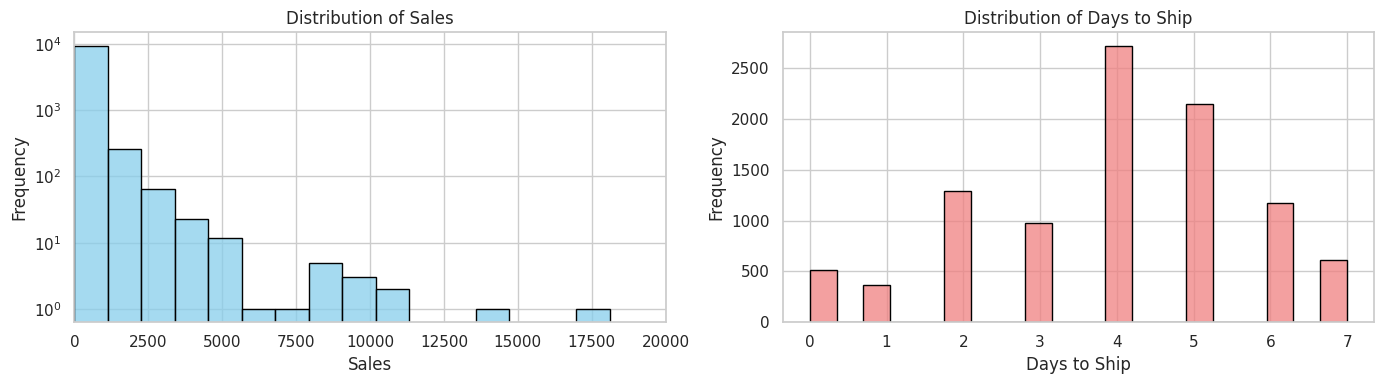

In [57]:
# Create a side-by-side histogram subplot for sales and days to ship
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# First subplot for sales distribution
sns.histplot(stores['sales'], bins=20, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Distribution of Sales')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, 20000)
axes[0].set_yscale('log')

# Second subplot for days to ship distribution
sns.histplot(stores['days_to_ship'], bins=20, color='lightcoral', edgecolor='black', ax=axes[1])
axes[1].set_title('Distribution of Days to Ship')
axes[1].set_xlabel('Days to Ship')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the visualizations
plt.show()



Observation:

    Sales less than 5000 are quiet common.
    Most shipments take 4 days to ship




## **2. Time Series Plots**

Plot time series graphs to understand the trends and patterns in sales over the 4-year period.

Here, we create a time series plot for monthly sales in the 'stores' DataFrame. The plot displays the trend in monthly sales over time using Seaborn.


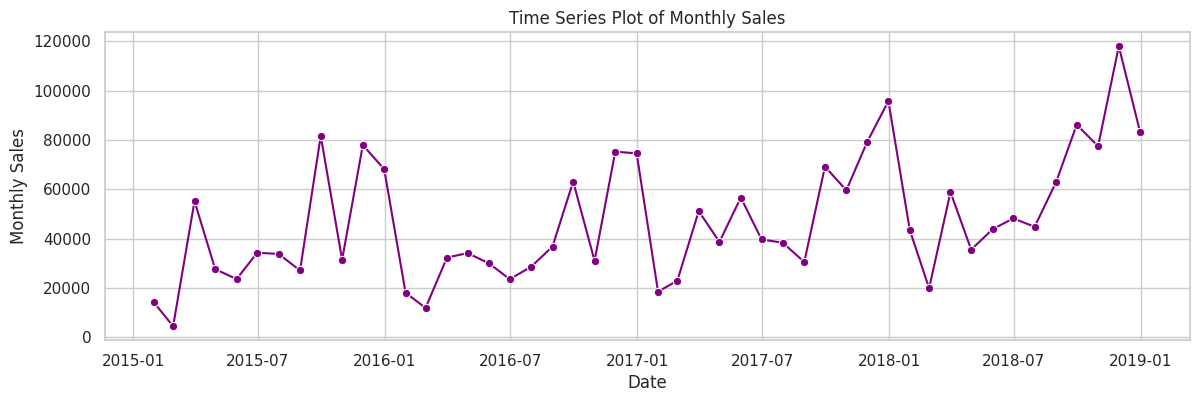

In [58]:
# Create a time series plot for monthly sales
plt.figure(figsize=(14, 4))

# Convert 'order_date' to datetime format
stores['order_date'] = pd.to_datetime(stores['order_date'], format='%m/%d/%Y')

# Resample monthly and sum sales
time_series_sales = stores.resample('M', on='order_date')['sales'].sum().reset_index()

# Plot the time series using Seaborn
sns.lineplot(data=time_series_sales, x='order_date', y='sales', marker='o', color='purple')
plt.title('Time Series Plot of Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Monthly Sales')

# Show the plot
plt.show()

Observation:
We couldn't predict, but the company seems to earn in last 2 years and tend to grow more.


### **3. Seasonal Decomposition**

Decompose time series data into components like trend, seasonality, and residuals for deeper insights.
Reference : Link

In this code, we perform seasonal decomposition on the 'sales' column in the time_series_sales DataFrame and plot the observed, trend, seasonal, and residual components separately. The resulting visualizations provide insights into the different aspects of the time series data.


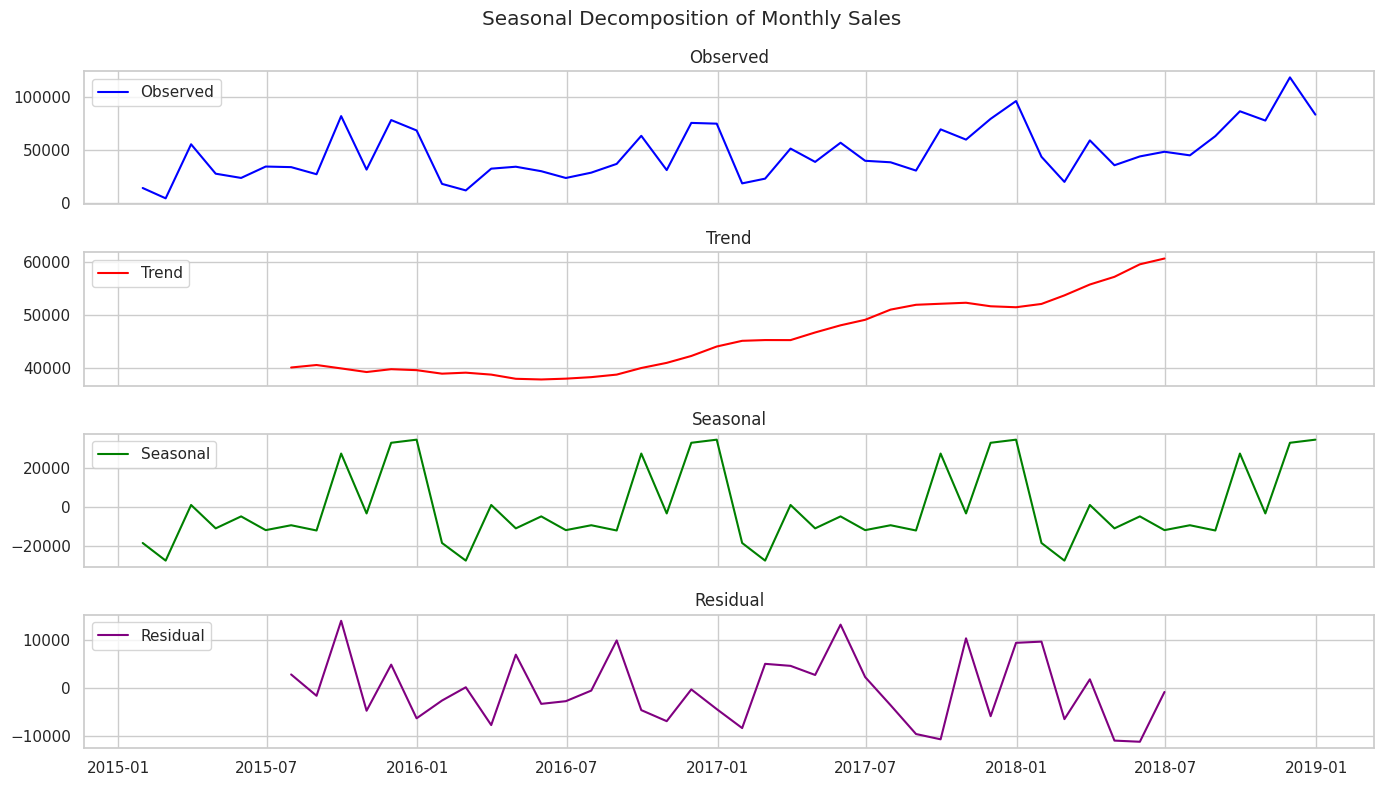

In [59]:
# Perform seasonal decomposition on the 'sales' column in the time_series_sales DataFrame
result = seasonal_decompose(time_series_sales['sales'], model='additive', period=12)

# Plot individual components
fig, axes = plt.subplots(4, 1, figsize=(14, 8), sharex=True)

axes[0].plot(time_series_sales['order_date'], result.observed, label='Observed', color='blue')
axes[0].legend(loc='upper left')
axes[0].set_title('Observed')

axes[1].plot(time_series_sales['order_date'], result.trend, label='Trend', color='red')
axes[1].legend(loc='upper left')
axes[1].set_title('Trend')

axes[2].plot(time_series_sales['order_date'], result.seasonal, label='Seasonal', color='green')
axes[2].legend(loc='upper left')
axes[2].set_title('Seasonal')

axes[3].plot(time_series_sales['order_date'], result.resid, label='Residual', color='purple')
axes[3].legend(loc='upper left')
axes[3].set_title('Residual')

plt.suptitle('Seasonal Decomposition of Monthly Sales')
plt.tight_layout()
plt.show()

Observation:
Okay! Now I am sure that company is really growing!


### **4. Box Plots**

Use box plots to identify outliers and understand the distribution of numeric variables.

Here, we use Seaborn to create a box plot of sales by category in the 'stores' DataFrame. The y-axis is set to a logarithmic scale for a better representation of the data distribution.


<ipython-input-60-a3ae334ebd2a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='sales', data=stores, palette='viridis')


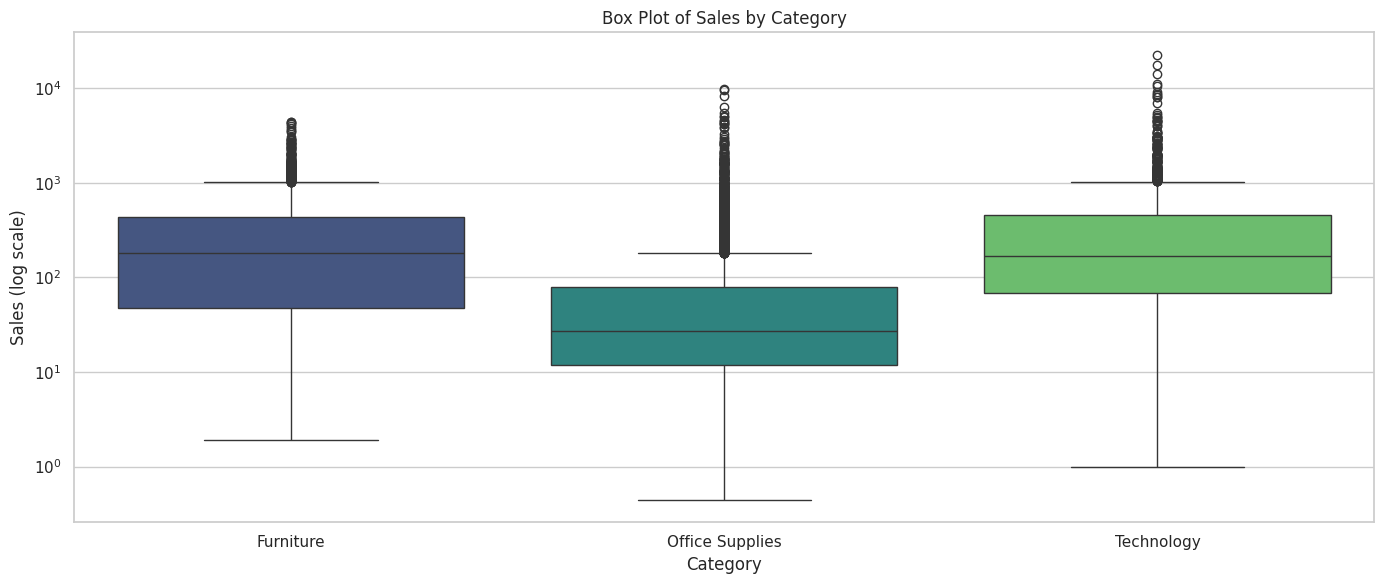

In [60]:
# Create a box plot of sales by category using Seaborn
plt.figure(figsize=(14, 6))
sns.boxplot(x='category', y='sales', data=stores, palette='viridis')
plt.yscale('log')
plt.title('Box Plot of Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales (log scale)')
plt.tight_layout()
plt.show()


Observation:
Outliers seem to be strict.


# ***5. Sales Distribution by Category***

Visualize the distribution of sales across different categories using bar charts or pie charts.

In this code, we calculate the total sales by category and create subplots with a bar plot and a pie chart to visualize the distribution of sales across categories in the 'stores' DataFrame.


<ipython-input-61-7cf5ba9b34cf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='sales', data=category_sales, palette='crest', ax=axes[0], order=category_sales['category'], width=0.3)


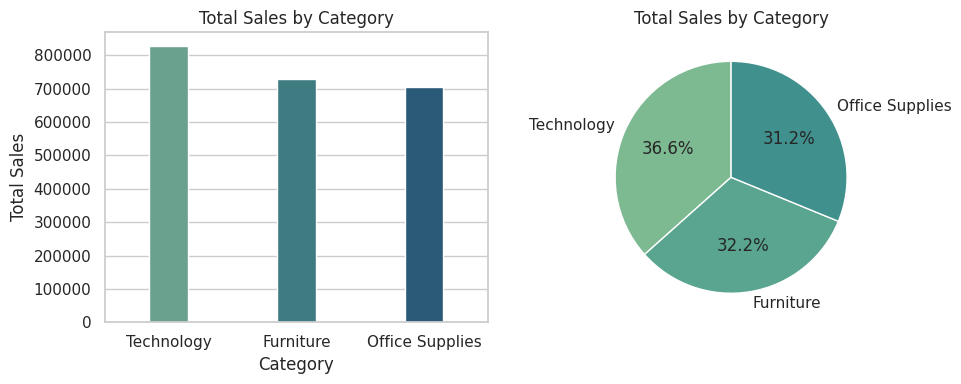

In [61]:
# Calculate total sales by category
category_sales = stores.groupby('category')['sales'].sum().reset_index()

# Sort the data by sales in descending order
category_sales = category_sales.sort_values(by='sales', ascending=False)

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Bar plot on the first subplot
sns.barplot(x='category', y='sales', data=category_sales, palette='crest', ax=axes[0], order=category_sales['category'], width=0.3)
axes[0].set_title('Total Sales by Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Total Sales')

# Pie chart on the second subplot
axes[1].pie(category_sales['sales'], labels=category_sales['category'], autopct='%1.1f%%', colors=sns.color_palette('crest'), startangle=90)
axes[1].set_title('Total Sales by Category')

# Display the plots
plt.tight_layout()
plt.show()

Observation:
Its interesting to see that Technology has more amount of sale.


### **6. Sales Variation Over Time**

Plot line charts to observe how sales vary over different time periods (months, quarters, years).

Here, we calculate monthly, quarterly, and yearly sales variations and create a Seaborn-style line plot to visualize how sales vary over time in the 'stores' DataFrame. The plot displays monthly, quarterly, and yearly trends with different colors and markers.


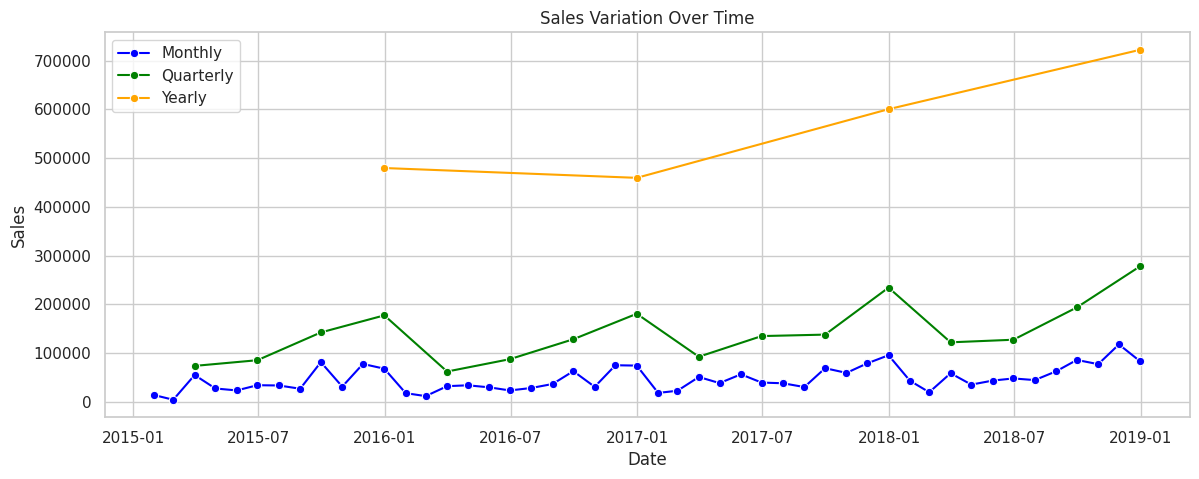

In [62]:
# Calculate monthly, quarterly, and yearly sales variations
monthly_sales_variation = stores.resample('M', on='order_date')['sales'].sum()
quarterly_sales_variation = stores.resample('Q', on='order_date')['sales'].sum()
yearly_sales_variation = stores.resample('Y', on='order_date')['sales'].sum()

# Create a Seaborn-style plot using lineplot
plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_sales_variation, marker='o', color='blue', label='Monthly')
sns.lineplot(data=quarterly_sales_variation, marker='o', color='green', label='Quarterly')
sns.lineplot(data=yearly_sales_variation, marker='o', color='orange', label='Yearly')

# Set titles and labels
plt.title('Sales Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')

# Add legend
plt.legend()

# Display the plot
plt.show()

Observation:
For Yearly, its been growing For month and daily basis, there is a zigzag pattern with a growing trend.

### **Data Vizualization: Bivariate**


### **1. Correlation Analysis**

Examine the correlation between sales and other relevant numeric variables.

In this code, we calculate the correlation matrix for the numeric columns in the 'stores' DataFrame and create a heatmap using Seaborn to visually represent the correlations between different variables. The heatmap includes annotations with correlation values and uses the 'crest' color map.


<ipython-input-63-d922d7798e8c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = stores.corr()


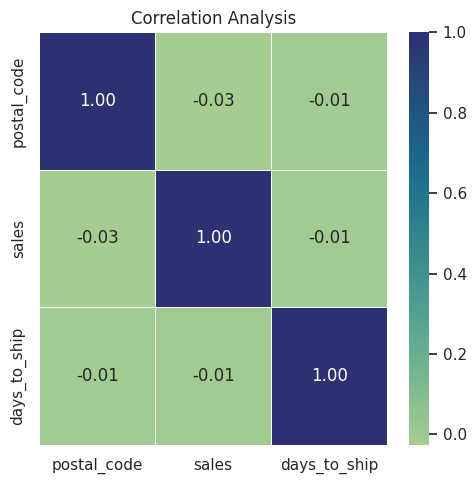

In [63]:
# Calculate the correlation matrix
correlation_matrix = stores.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f", linewidths=.5)
plt.title('Correlation Analysis')
plt.tight_layout()
plt.show()

Observation:
Gives an understanding to sales to shipment days


### **2. Scatter Plots**

Plot scatter plots to explore the relationship between sales and another numeric variable.

This code creates a figure with three scatter plots side by side to compare the relationships between sales and days to ship, sales and order year, and sales and ship mode in the 'stores' DataFrame. Each subplot is labeled with the respective titles and axis labels for clarity.


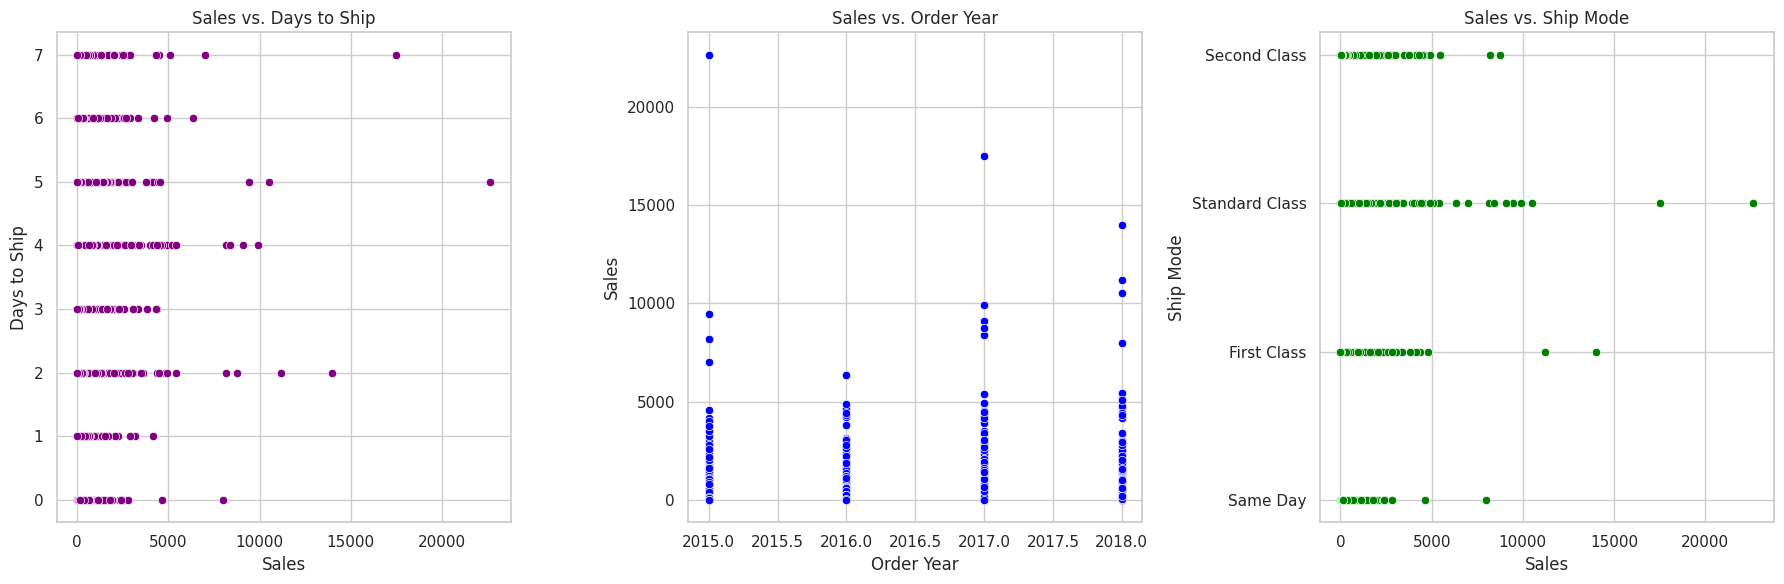

In [64]:
# Create a figure with three scatter plots side by side
plt.figure(figsize=(18, 6))

# Scatter Plot: Sales vs. Days to Ship
plt.subplot(1, 3, 1)
sns.scatterplot(x='sales', y='days_to_ship', data=stores, color='purple')
plt.title('Sales vs. Days to Ship')
plt.xlabel('Sales')
plt.ylabel('Days to Ship')

# Scatter Plot: Sales vs. Order Date
plt.subplot(1, 3, 2)
sns.scatterplot(x=stores['order_date'].dt.year, y='sales', data=stores, color='blue')
plt.title('Sales vs. Order Year')
plt.xlabel('Order Year')
plt.ylabel('Sales')

# Scatter Plot: Sales vs. Ship Mode
plt.subplot(1, 3, 3)
sns.scatterplot(x='sales', y='ship_mode', data=stores, color='green')
plt.title('Sales vs. Ship Mode')
plt.xlabel('Sales')
plt.ylabel('Ship Mode')

# Adjust layout
plt.tight_layout()
plt.show()



Observation:

    It seems that the company is uniform to delivery standards. Order size doesn't priortize the order delivery dates to reduce.
    In 2018 seem like they are growing with more number of big sales.
    Most of the sale is a Standard Class Delivery.




### **3. Pair Plots**

Use pair plots for a quick overview of relationships between multiple numeric variables.

Here, we create a pair plot using Seaborn for the numeric variables 'sales' and 'days_to_ship' in the 'stores' DataFrame. The pair plot provides a visual representation of the relationships between these numeric variables.


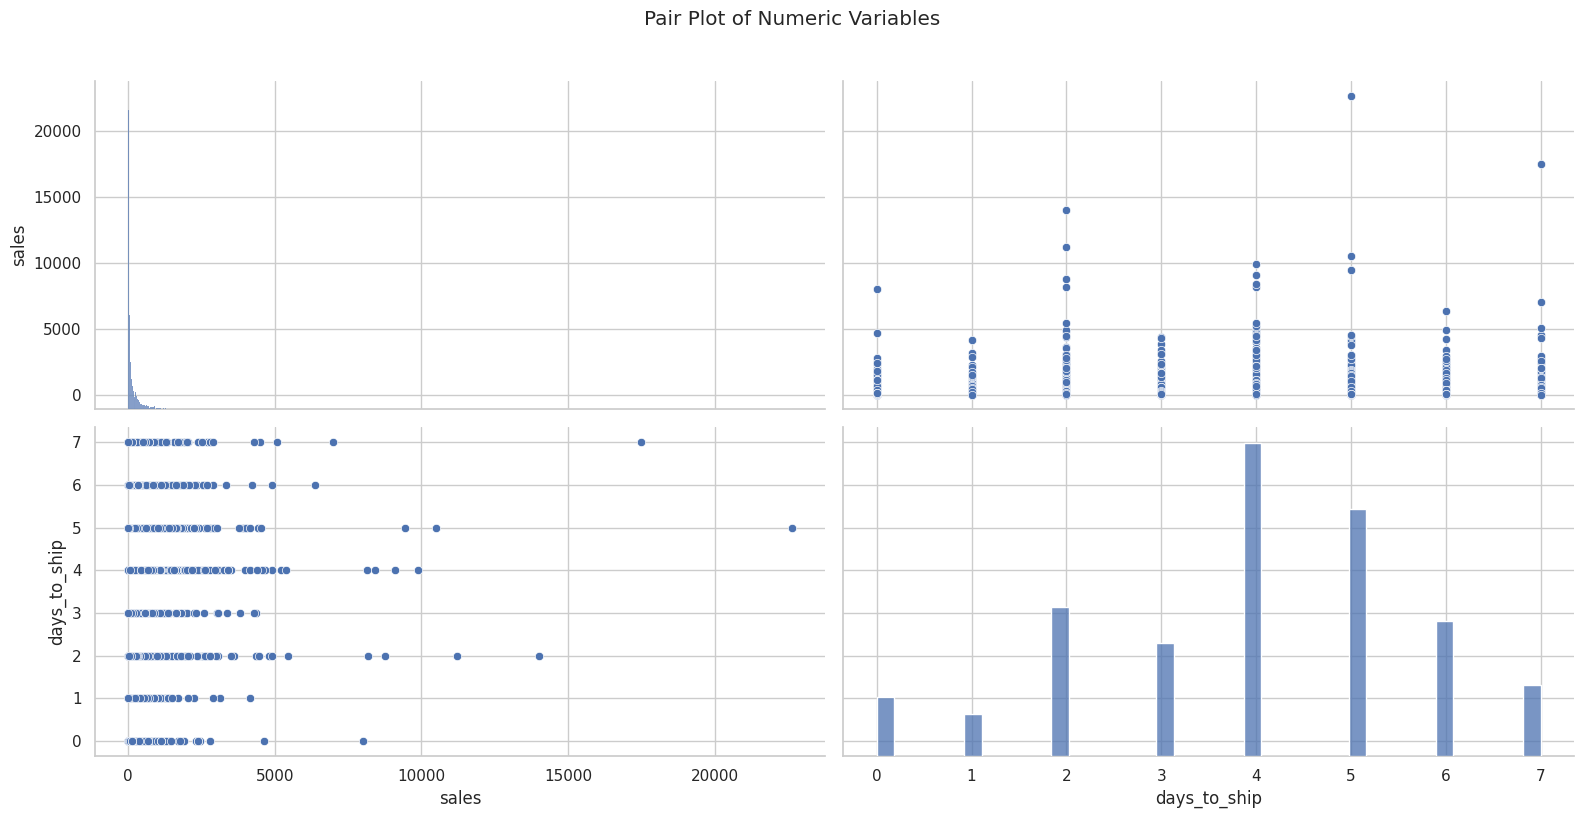

In [65]:
# Generate a pair plot for selected numeric variables using Seaborn
numeric_columns = ['sales', 'days_to_ship']
sns.pairplot(stores[numeric_columns], height=4, aspect=2)
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.tight_layout()
plt.show()


### **Observation:**
Gives analysis to days to ship and sales. They don't depend on each other.


### **4. Category-wise Sales Trends**

Analyze how sales trends differ across different categories using line charts.
Reference: pd.Grouper Saved my Day 🙂

Here, we convert the 'order_date' column to datetime format, then resample the data to calculate the monthly average sales for each category. The resulting trends are visualized using a line plot with a logarithmic scale on the y-axis for better representation.


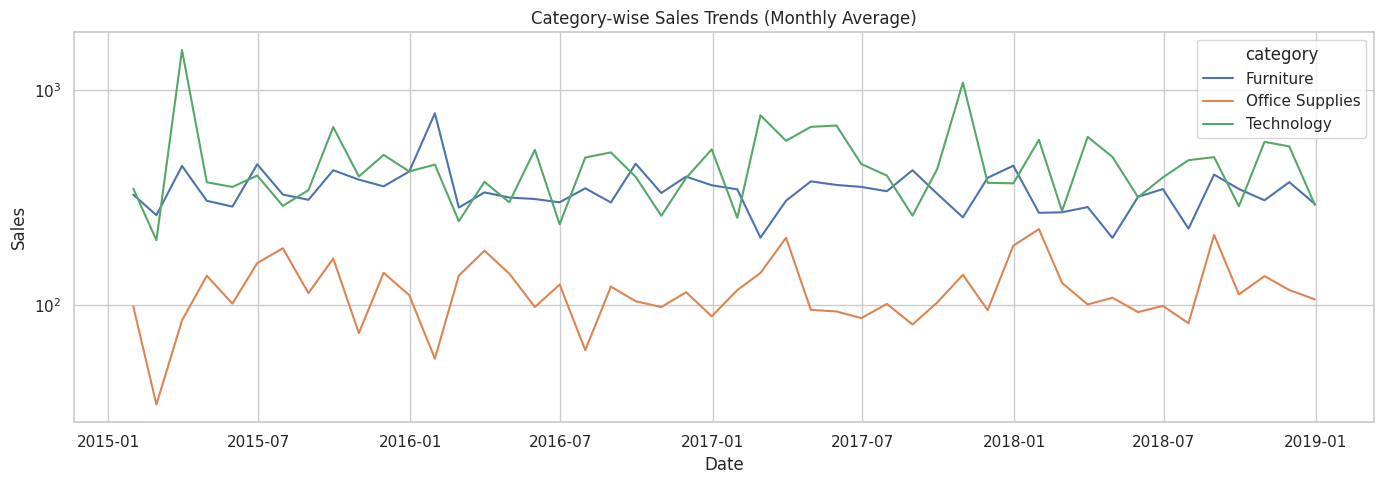

In [66]:
# Convert 'order_date' to datetime format
stores['order_date'] = pd.to_datetime(stores['order_date'])

# Resample the data to monthly average for each category
monthly_avg_sales = stores.groupby(['category', pd.Grouper(key='order_date', freq='M')])['sales'].mean().reset_index()

# Create a line plot with log scale for the y-axis
plt.figure(figsize=(14, 5))
sns.lineplot(x='order_date', y='sales', hue='category', data=monthly_avg_sales)
plt.yscale('log')
plt.title('Category-wise Sales Trends (Monthly Average)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()



### **Observation:**
Shows that Technology is always on demand than that of Furniture and office supplies.

Here, we convert the 'order_date' column to datetime format and resample the data to calculate the monthly average sales for each sub-category. The trends are visualized using a line plot with a logarithmic scale on the y-axis using Plotly Express for interactive and detailed exploration.


In [67]:
# Convert 'order_date' to datetime format
stores['order_date'] = pd.to_datetime(stores['order_date'])

# Resample the data to monthly average for each sub_category
monthly_avg_sales = stores.groupby(['sub_category', pd.Grouper(key='order_date', freq='M')])['sales'].mean().reset_index()

# Create a line plot with log scale for the y-axis using Plotly Express
fig = px.line(monthly_avg_sales, x='order_date', y='sales', color='sub_category',
              labels={'sales': 'Sales', 'order_date': 'Date', 'sub_category': 'Sub-Category'},
              title='Sub-Category-wise Sales Trends (Monthly Average)',
              log_y=True, width=1200, height=500)

# Show the plot
fig.show()


### **Observation:**
I don't know why they need sooooo many copiers and machines for binding.


### **5. Heatmaps**

Create heatmaps to visualize the correlation matrix for better insights

In this code, we use Seaborn to generate a heatmap for the correlation matrix, visualizing the correlations between different variables. The color intensity and annotations provide insights into the strength and direction of the correlations.


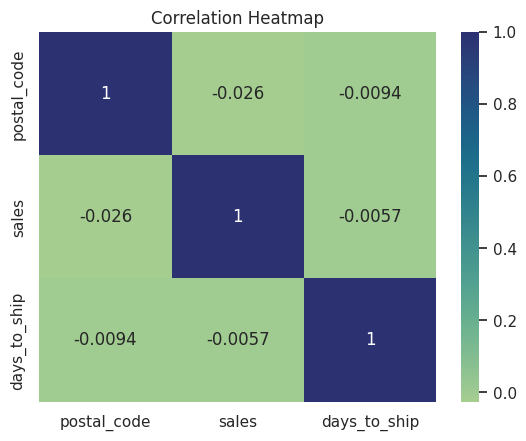

In [68]:
# Create a heatmap for the correlation matrix using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Correlation Heatmap')
plt.show()

### **Observation:**
Gives an understanding to sales to shipment days


### **6. Sales by Region**

Compare sales across different regions using bar charts or stacked bar charts.

In this code, we calculate the total sales by region and create subplots with a bar plot and a pie chart to visualize the distribution of sales across different regions in the 'stores' DataFrame.


<ipython-input-69-e42d015deedd>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




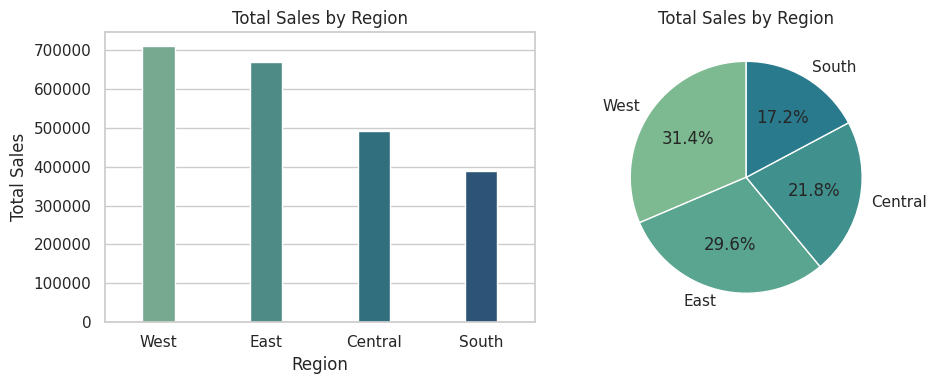

In [69]:
# Calculate total sales by region
region_sales = stores.groupby('region')['sales'].sum().reset_index()

# Sort the data by sales in descending order
region_sales = region_sales.sort_values(by='sales', ascending=False)

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Bar plot on the first subplot
sns.barplot(x='region', y='sales', data=region_sales, palette='crest', ax=axes[0], order=region_sales['region'], width=0.3)
axes[0].set_title('Total Sales by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Total Sales')

# Pie chart on the second subplot
axes[1].pie(region_sales['sales'], labels=region_sales['region'], autopct='%1.1f%%', colors=sns.color_palette('crest'), startangle=90)
axes[1].set_title('Total Sales by Region')

# Display the plots
plt.tight_layout()
plt.show()

## **Observation:**
People from West region of US order more supplies from superstore then comes East then Central and South


### **7. Customer Segment Analysis**

Explore sales trends for different customer segments using line charts or bar charts.

Here, we convert the 'order_date' column to datetime format, resample the data to calculate the monthly average sales for each customer segment, and visualize the trends using a line plot with a logarithmic scale on the y-axis.


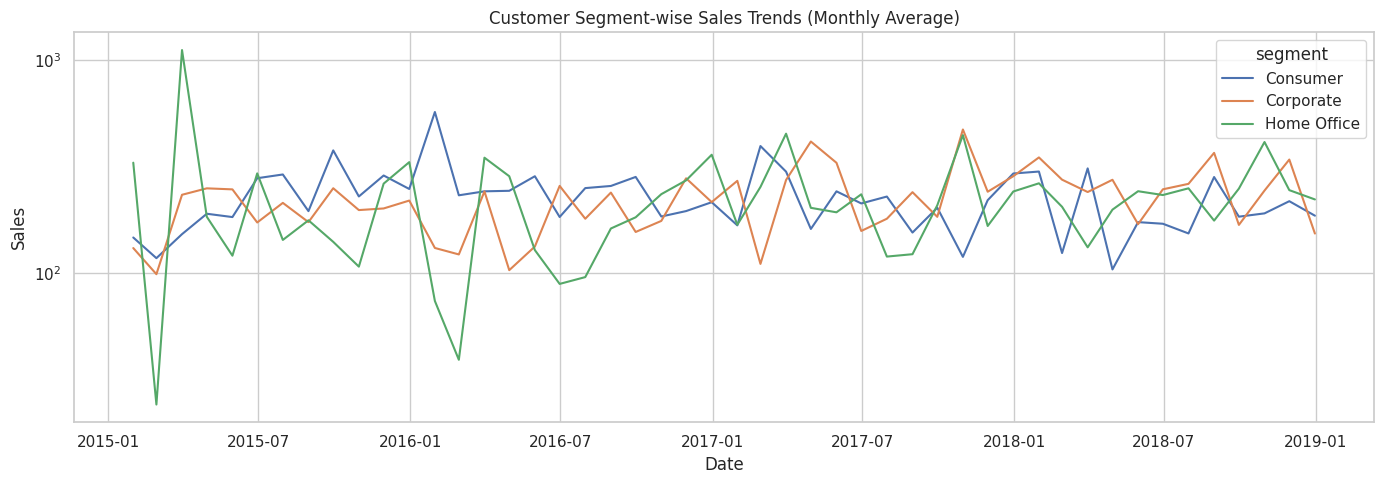

In [70]:
# Convert 'order_date' to datetime format
stores['order_date'] = pd.to_datetime(stores['order_date'])

# Resample the data to monthly average for each segment
monthly_avg_sales = stores.groupby(['segment', pd.Grouper(key='order_date', freq='M')])['sales'].mean().reset_index()

# Create a line plot with log scale for the y-axis
plt.figure(figsize=(14, 5))
sns.lineplot(x='order_date', y='sales', hue='segment', data=monthly_avg_sales)
plt.yscale('log')
plt.title('Customer Segment-wise Sales Trends (Monthly Average)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

## **Observation:**
I guess there is a clash between the manager who wants work from office and employees who want work from home.


### **8. Sales vs. Quantity**

Investigate the relationship between sales and quantity sold using scatter plots.

Here, we identify and visualize the top 8 selling items by quantity using a count plot. The figure width is increased for better presentation of the information.


<ipython-input-71-aafa300a1f9b>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




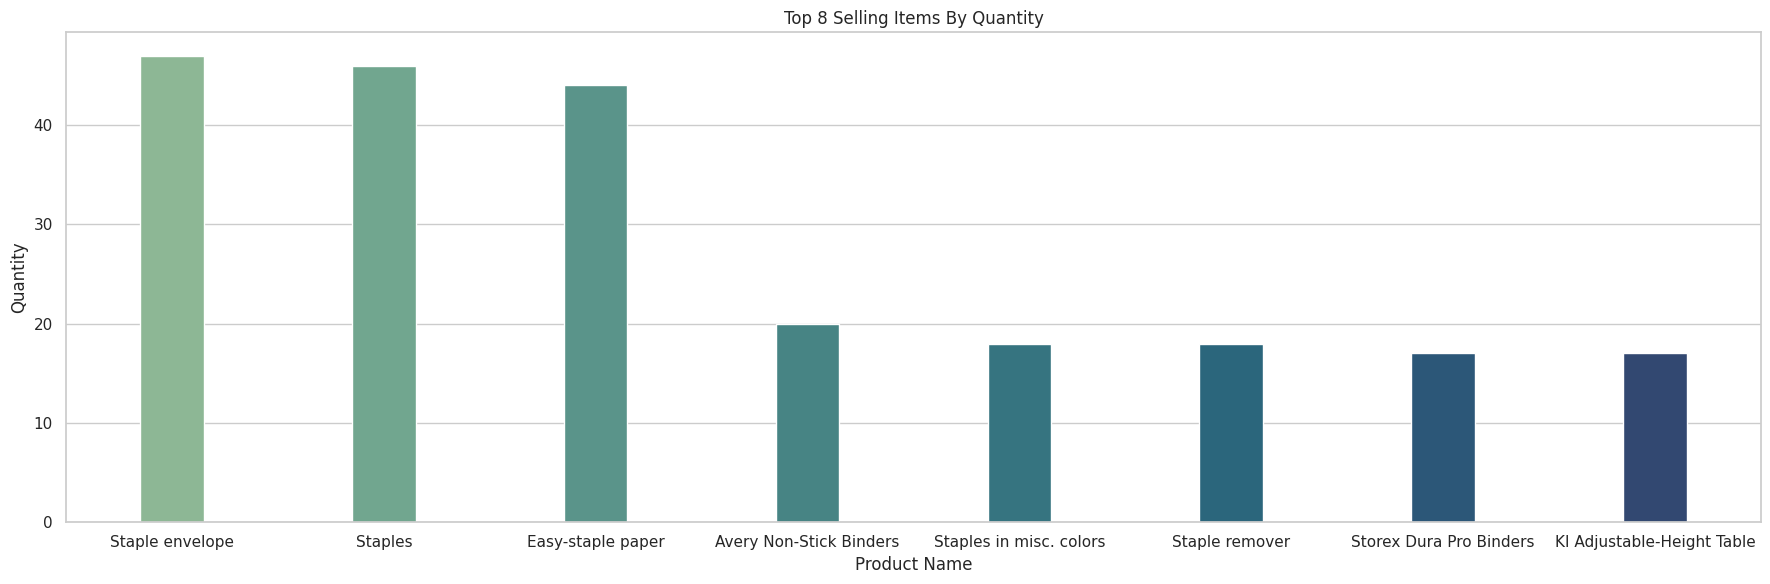

In [71]:
# Identify the top 8 selling items
top_8_products = stores['product_name'].value_counts().nlargest(8).index

# Create a count plot to visualize the quantity of the top 8 selling items
plt.figure(figsize=(18, 6))  # Increase the width of the figure
sns.countplot(x='product_name', data=stores[stores['product_name'].isin(top_8_products)], order=top_8_products, palette='crest', width=0.3)
plt.title('Top 8 Selling Items By Quantity')
plt.xlabel('Product Name')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()


### **Observation:**
Envelop and staples ! I agree, to attach and hide secret documents.


### **9. Customer Segment vs. Quantity**

Compare the quantity sold across different customer segments using bar charts.

Here, we analyze and visualize the distribution of customer segments using a bar plot and a pie chart. The bar plot provides a detailed quantity breakdown, while the pie chart offers a proportional representation of customer segments.


<ipython-input-72-a2d4657ba8a5>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




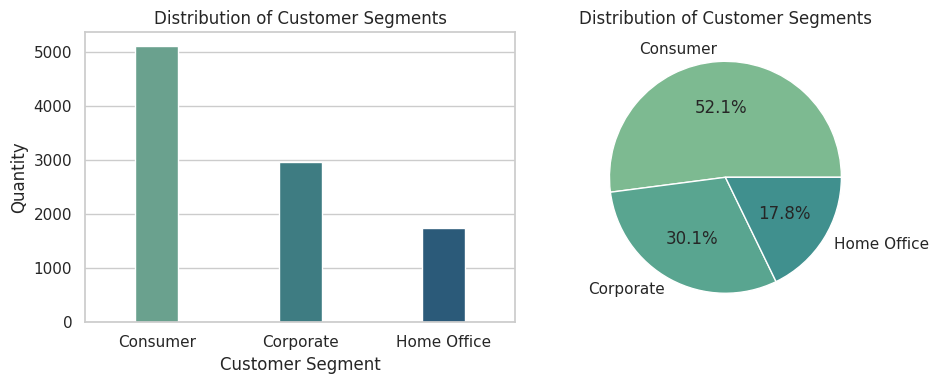

In [72]:


# Segment distribution
segment_counts = stores['segment'].value_counts().reset_index()

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Bar plot on the first subplot
sns.barplot(x='index', y='segment', data=segment_counts, palette='crest', ax=axes[0], width=0.3)
axes[0].set_title('Distribution of Customer Segments')
axes[0].set_xlabel('Customer Segment')
axes[0].set_ylabel('Quantity')

# Pie chart on the second subplot
axes[1].pie(segment_counts['segment'], labels=segment_counts['index'], autopct='%1.1f%%', colors=sns.color_palette('crest'))
axes[1].set_title('Distribution of Customer Segments')

# Display the plots
plt.tight_layout()
plt.show()



## **Observation:**
The company is mostly B2C as it is customer centric.


### **10. Shipping Mode vs. Sales**

Explore the relationship between shipping modes and sales using categorical plots.

Here, we analyze and visualize total sales by shipping mode using a bar plot. Additionally, we explore the relationship between ship mode and days to ship using another bar plot on the second subplot. The second plot helps understand how different shipping modes affect the time taken to ship products.


<ipython-input-73-3c3c9fe2a62b>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-73-3c3c9fe2a62b>:23: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.


<ipython-input-73-3c3c9fe2a62b>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




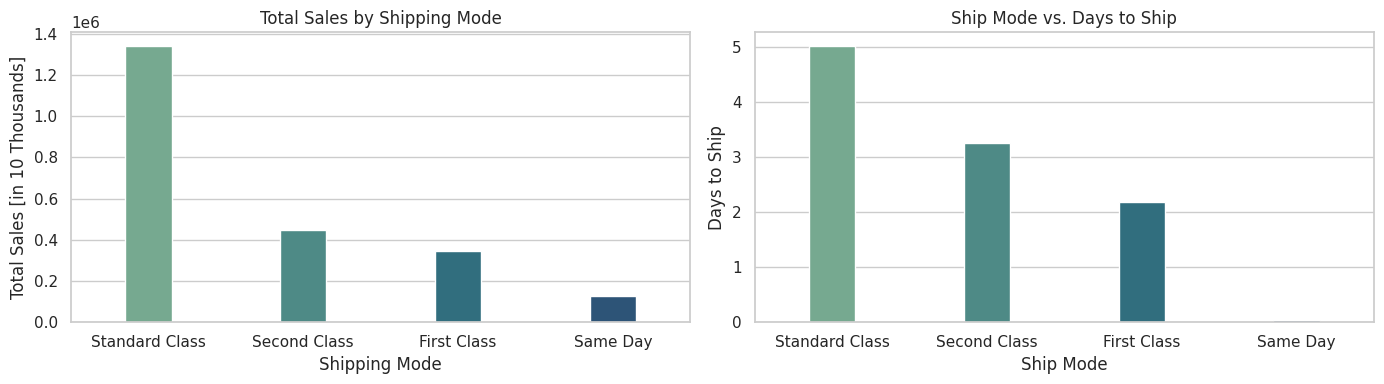

In [73]:
# Analyze total sales by shipping mode
ship_mode_sales = stores.groupby('ship_mode')['sales'].sum().reset_index()

# Sort the data by sales in descending order
ship_mode_sales = ship_mode_sales.sort_values(by='sales', ascending=False)

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Bar plot for total sales by shipping mode on the first subplot
sns.barplot(x='ship_mode', y='sales', data=ship_mode_sales, palette='crest', ax=axes[0], order=ship_mode_sales['ship_mode'], width=0.3)
axes[0].set_title('Total Sales by Shipping Mode')
axes[0].set_xlabel('Shipping Mode')
axes[0].set_ylabel('Total Sales [in 10 Thousands]')

# Analyze the relationship between ship mode and days to ship
ship_mode_days_to_ship = stores.groupby('ship_mode')['days_to_ship'].mean().reset_index()

# Sort the data by days to ship in descending order
ship_mode_days_to_ship = ship_mode_days_to_ship.sort_values(by='days_to_ship', ascending=False)

# Bar plot for ship mode vs. days to ship on the second subplot
sns.barplot(x='ship_mode', y='days_to_ship', data=stores, ax=axes[1], palette='crest', ci=False, order=ship_mode_days_to_ship['ship_mode'], width=0.3)
axes[1].set_title('Ship Mode vs. Days to Ship')
axes[1].set_xlabel('Ship Mode')
axes[1].set_ylabel('Days to Ship')

# Display the plots
plt.tight_layout()
plt.show()



## **Observation:**

    Most people prefer standard class. Who has money for same day deliver?
    the comany really works hard on their delivery procedure.




### **11. Product-wise Sales Analysis**

Investigate how sales vary for different products or categories using bar charts or line charts.

Here, we identify and visualize the top 20 products by sales using a horizontal bar plot. The length of each bar represents the sales amount, providing a clear comparison of product performance.


<ipython-input-74-28c350cff05a>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




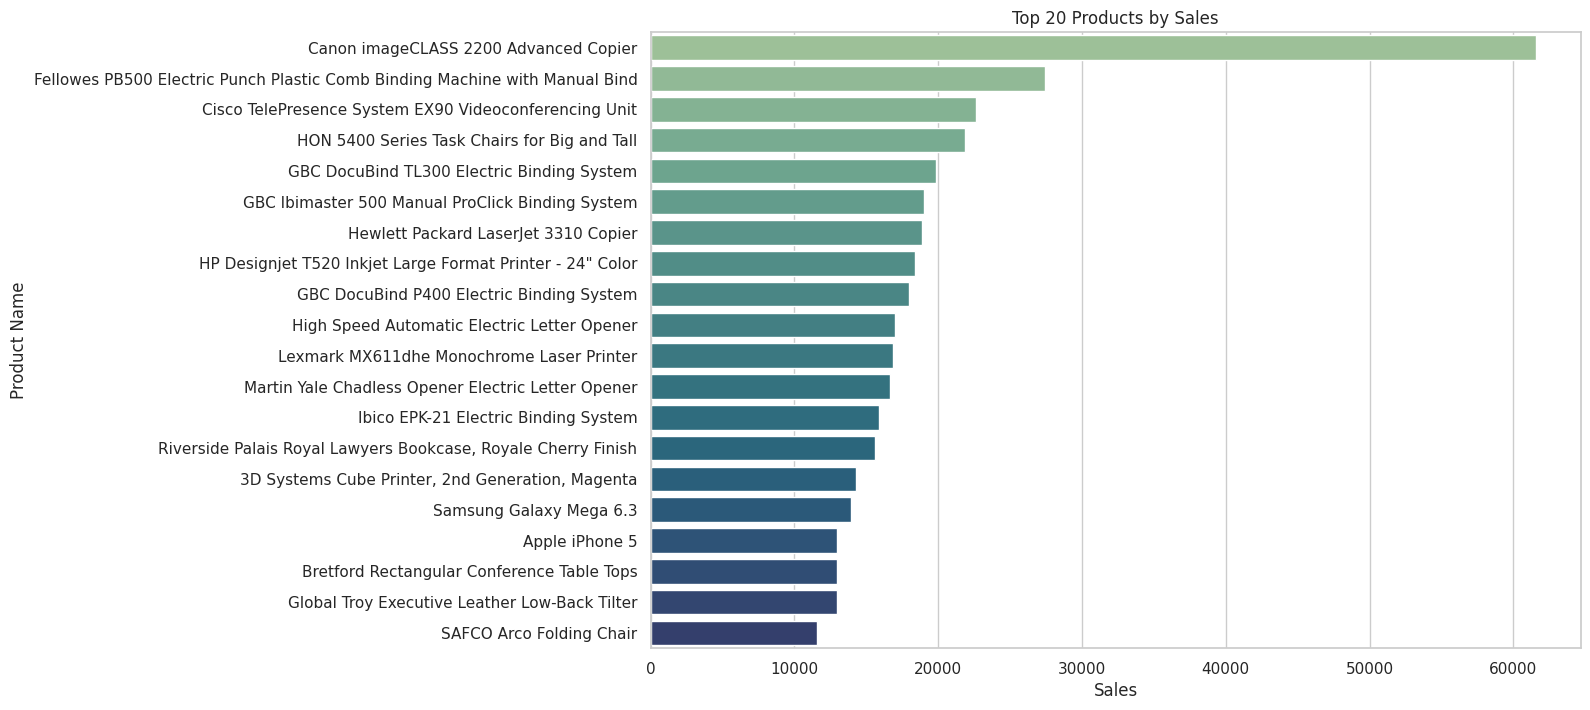

In [74]:
# Identify and visualize the top 20 products by sales with a horizontal bar plot
top_products = stores.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(20).reset_index()

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y='product_name', x='sales', data=top_products, palette='crest')
plt.title('Top 20 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()

## **Observation:**
Again Binder and Copier! Need to catch the person who breaks it !


### **12. Region-wise Product Sales**

Compare product sales across different regions using grouped bar charts.

Here, we use Plotly Express to create a horizontal bar plot that visualizes sales by state. The color of each bar represents the sales amount, and the logarithmic scale on the x-axis provides a clearer view of the distribution. The layout is adjusted for better presentation.


In [75]:
# Visualize sales by state using a horizontal bar plot with Plotly Express
fig = px.bar(stores, x='sales', y='state', orientation='h', color='sales',
             color_continuous_scale='viridis', error_x=None,
             labels={'sales': 'Sales', 'state': 'States'},
             title='Sales by State',
             log_x=True)

# Adjust the layout
fig.update_layout(height=600, width=1100)

# Display the plot
fig.show()




# **Observation:**
Looks really messy but Florida and Indiana has most sales

Here, we use Seaborn to create subplots for the top 10 states and cities by sales. The bar plots are sorted in descending order by sales, and the x-axis is displayed on a logarithmic scale for better visualization of the distribution. The layout is adjusted for a clear presentation

<ipython-input-76-28ccebff467e>:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-76-28ccebff467e>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-76-28ccebff467e>:16: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-76-28ccebff467e>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




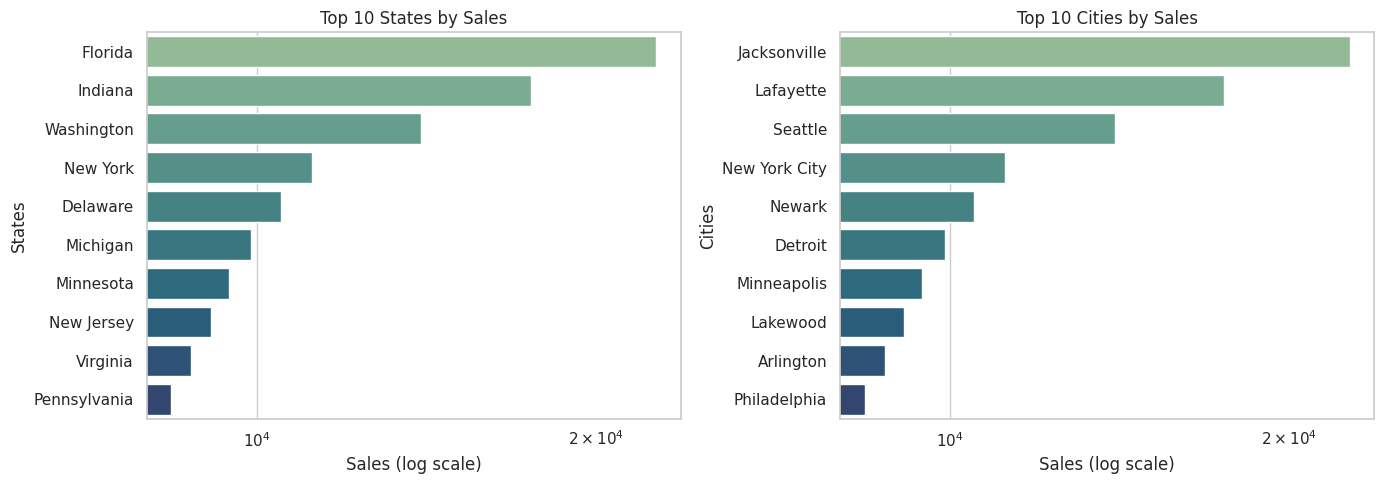

In [76]:
# Sort the data by sales in descending order and select the top 10 for both states and cities
top_states = stores.sort_values(by='sales', ascending=False).head(10)
top_cities = stores.sort_values(by='sales', ascending=False).head(10)

# Create subplots for states and cities
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Top 10 States
sns.barplot(x='sales', y='state', data=top_states, palette='crest', ci=None, ax=axes[0])
axes[0].set_title('Top 10 States by Sales')
axes[0].set_xlabel('Sales (log scale)')
axes[0].set_ylabel('States')
axes[0].set_xscale('log')

# Top 10 Cities
sns.barplot(x='sales', y='city', data=top_cities, palette='crest', ci=None, ax=axes[1])
axes[1].set_title('Top 10 Cities by Sales')
axes[1].set_xlabel('Sales (log scale)')
axes[1].set_ylabel('Cities')
axes[1].set_xscale('log')

# Adjust layout
plt.tight_layout()
plt.show()




## **Observation:**

    Florida, Indiana has most customer base as countries
    Jacksonville and Lafayette has more customer base as cities

Here, we extract the year from the 'order_date' column and use Seaborn to create a bar plot illustrating the yearly sales. The x-axis represents the years, while the y-axis shows the total sales for each year. The bar plot is customized for clear presentation using the 'viridis' color palette.


<ipython-input-77-ae57a53eff3b>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-77-ae57a53eff3b>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




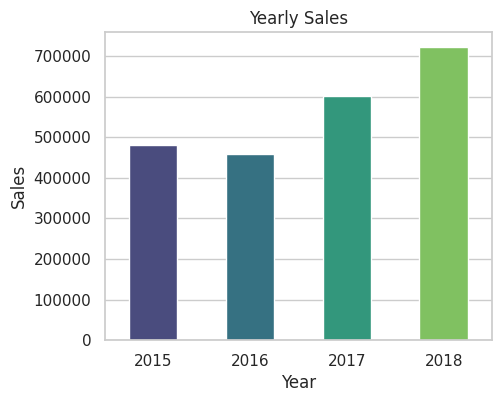

In [77]:
# Extract the year from the 'order_date' column and create a bar plot for yearly sales
plt.figure(figsize=(5, 4))
sns.barplot(x=stores['order_date'].dt.year, y='sales', data=stores, palette='viridis', width=0.5, estimator=sum, ci=None)
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

### **Observation:**
2018 has most sales. that means the company is growing with time really fast.